In [1]:
import sys
sys.path.append('python/')

import time
startTime = time.time()           # Calculate time for running this notebook

import numpy as np
import matplotlib.pyplot as plt 
import load_galaxies as lg        # Load load_galaxies.py library
import matplotlib.image as mpimg

_Python help: Running the notebook the first time, make sure to run all cells to be able to make changes in the notebook. Hit Shift+Enter to run the cell or click on the top menu: Kernel > Restart & Run All > Restart and Run All Cells to rerun the whole notebook. If you make any changes in a cell, rerun that cell._

# Rotation Curve Plotting

The next step in the rotation curve analysis process is to measure the light from a galaxy and decompose it into components: bulge, disk, gas, and a possible central supermassive black hole. You may then add a dark matter halo component to account for the 'missing mass'. In this notebook, select one of four galaxies, import the prepared curves of all components and __build your own rotation curve__. You will be able to see the difference between a rotation curve with and without dark matter.<br>

_Sneak peak: Future workshops will include learning the process of creating a rotation curve for each component._

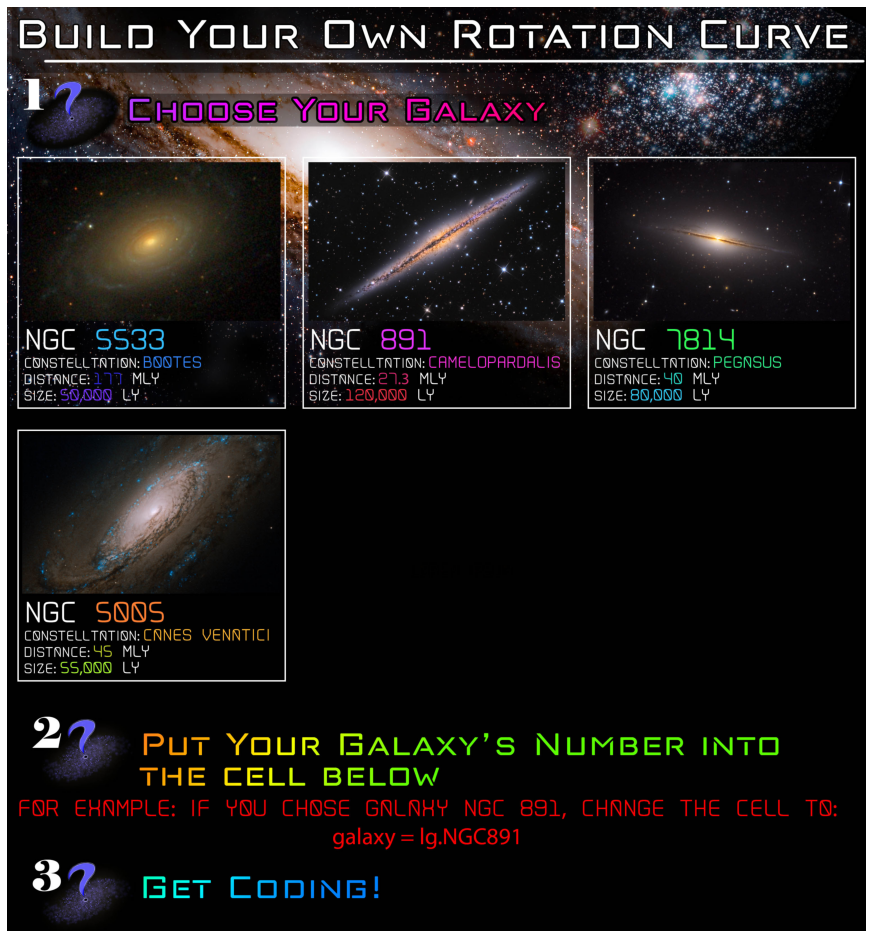

In [2]:
# Display image for choosing a galaxy
img = mpimg.imread('images/choosegalaxy.jpg')
plt.figure(figsize=(20,17))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

1. __Choose your galaxy__

In [3]:
galaxy = lg.NGC5533              # 'galaxy' now refers to your chosen galaxy

## Import measured radial velocity data of the chosen galaxy

In [4]:
# Measured data
measured_data = galaxy['measured_data']

# Separate the columns of the data into arrays
m_radii = galaxy['m_radii']           # Radius
m_velocities = galaxy['m_velocities'] # Velocity
m_r_errors = galaxy['m_r_errors']     # Errors in radius
m_v_errors = galaxy['m_v_errors']     # Errors in velocity         

## Import each component of the chosen galaxy

In [5]:
# Note: the following data has been 'splined' using scipy.interpolate.BSpline 
# which means the data points has been connected and turned into a function.
# You will need to call these variables as functions of radius at selected points. 
# For example: bulge_v(r), disk_v(r),...

# Bulge
bulge_v = galaxy['bulge']['spline']   
# Disk
disk_v = galaxy['disk']['spline']
# Gas
gas_v = galaxy['gas']['spline']

## Calculate central supermassive black hole component (only for NGC 5533)

You may calculate the central black hole component for NGC 5533. For the other three galaxies, the central black hole is already included in the bulge component, so this activity will not work for those galaxies. In some scientific publications, the components are combined to focus on specific features. For example: In a two-component model, only the halo and disk is plotted (see References: Casertano, 1983). In the case of NGC 7814, the bulge curve we used includes the possible black hole. (Note that this is not specified in the article (see References: Fraternali, Sancisi, and Kamphuis 2011) but is suggested in the NASA website: https://www.nasa.gov/feature/goddard/caldwell-43.) <br><br>
As mentioned in the Interactive_Measured_Data_Plotting notebook, the supermassive black hole at the center of the galaxy acts as a point mass with negligible radius so we can use the mass as a single value (it does not have to be a function of radius). Use the equation for circular velocity, the estimated mass of the black hole to calculate the rotation of stars and gas due to the black hole. 
<br> <br>
1. __Change the radius value and keep the black hole mass the same to see how the velocity of stars and gas changes.__
2. __Change the mass of the black hole to see how the velocity of stars and gas changes at the same radius.__<br><br>

_Python help:_ 
- _If you would like to change a value but keep the original for future use, copy the line and then comment it out (i.e. type a # sign in front of the line) or just type a # sign in front of 'galaxy\['massbh'\]'. The mass of the black hole that is used in the calculation is printed below the cell._
- _Change the value of the mass of the black hole by changing the value for massbh. For example: massbh = 3e10_

In [11]:
# Set Parameters
massbh = galaxy['massbh']           # Mass of the central black hole in (solar mass) imported from a Python library
radius = 10                         # Radius to calculate velocity due to black hole component (in kpc)
G = 4.300e-6                        # Gravitational constant (kpc/solar mass*(km/s)^2)

# Display the mass of the black hole
print("Mass of the central supermassive black hole at the center of the galaxy {}: {:.3e} solar masses".format(galaxy['galaxyname'],massbh))

# Equation for orbital velocity
def blackhole_v(r,massbh):
    return np.sqrt((G*massbh)/r)

# Displaying the value of the velocity of stars and gas at a chosen radius
print("Velocity at r=10[kpc]: {:.3f} km/s".format(blackhole_v(radius,massbh)))

Mass of the central supermassive black hole at the center of the galaxy NGC 5533: 2.700e+09 solar masses
Velocity at r=10[kpc]: 34.073 km/s


## Calculate dark matter halo component

We are assuming that the density profile of the dark matter halo is isothermal. This profile describes the predicted structures of the dark matter and is dependent on the core radius and the central mass density. The core radius is the radius where we expect the density to decrease drastically, i.e. the size of the core. The central mass density is the density at the center of the galaxy.<br>
The velocity as a function of radius (rotation curve) for the dark matter halo can be calculated using this assumed density distribution. Plug in the enclosed mass equation and the density equation into the circular velocity formula. The two parameters that describe the velocity are the core radius and the central density that we can estimate and then evaluate by fitting. <br>

1. __Consider the density at large and small radii. Does the density increase as we look further from the center?__ <br>

Extra info: Other possible density profile is the Navarro-Frenk-White (NFW) profile (see References: Jimenez et al.). 

>__Isothermal Density Profile__: <br>
    \begin{equation}
    \rho(r) = \rho_{0}\left[1+{\left(\frac{r}{r_c}\right)}^{2}\right]^{-1}
    \end{equation}
    <br>
>>where:<br>
    $\rho_{0}$ = central density<br>
    $r_c$ = core radius<br>
    $r$ = radius or distance from the center of the galaxy
    
>__Enclosed Mass__: <br>
    \begin{equation}
    M_{DM}(r) = \int_{0}^{r} 4\pi\rho(r^{\prime})r^{\prime 2}d r^{\prime}
    \end{equation}<br>
>>where:<br>
        $M_{DM}$ = mass of the dark halo<br>
        $\rho(r)$ = density profile
    <br>
    
>__Velocity__: <br>
    \begin{equation}
    v_{DM}^{2}(r) = \frac{GM_{DM}(r)}{r}
    \end{equation}<br>
    \begin{equation}
    v_{DM}(r) = \sqrt{4 \pi G \rho_{0} r_c^2 \big( 1- \frac{r_c}{r} \arctan{\frac{r}{r_c}}\big)}
    \end{equation}<br>
    
   >where:<br>
        $G$ = gravitational constant<br>
    <br>

2. __Change the two dark matter parameters: rho0 and rc in the next cell to see how the velocity of the dark matter changes at the selected radius.__

In [14]:
# Set parameters
rho0 = galaxy['rho0']   # central mass density (in solar mass/kpc^3)
rc = galaxy['rc']       # core radius (in kpc)
radius = 10             # radius (in kpc)

# Display the two dark matter parameters
print("Central mass density: {:.2e} solar mass/kpc^3".format(rho0))
print("Core radius: {:.2f} kpc".format(rc))

# Equation for dark matter halo velocity
def halo_v(r,rho0,rc):
    v = np.sqrt(4*np.pi*G*rho0*rc**2*(1 - rc/r * np.arctan(r/rc)))
    return v

# Display the velocity at the selected radius
print("Velocity at {} kpc: {:.3f} km/s".format(radius,halo_v(radius,rho0,rc)))

Central mass density: 3.10e+08 solar mass/kpc^3
Core radius: 1.40 kpc
Velocity at 10 kpc: 162.022 km/s


## Calculate total velocity

All components of the galaxy contribute to the rotation curve or the total velocity of stars and gas. This can be added quadratically in the following way:

>__Total velocity__: <br>
    \begin{equation}
    v_{total}(r) = \sqrt{v_{bulge}^2 + v_{disk}^2 + v_{gas}^2 + v_{blackhole}^2 + v_{halo}^2}
    \end{equation}<br>

1. __Change the total velocity with the dark matter component included (total_v function) by removing each component of the galaxy to see how the total velocity changes in the rotation curve graph of the next section. For example: remove the bulge by deleting the term: "bulge_v(r)**2".__<br><br>

2. __Looking at the function without the dark matter halo (total_v_noDM function), let's consider a scenario where we increase the contribution from one of the components. Leaving all components in the equation, change the scaling parameter of each component one by one to see how the total curve of the next section changes. For example: if you want the contribution from the disk to the rotation curve to be doubled, change "dpref = 1" to "dpref = 2"__<br><br>

_Python help: Rerun the notebook to see the changes in the graph by hitting Shift+Enter on both the cells or by clicking on the menu: Kernel > Restart & Run All > Restart and Run All Cells._

In [17]:
# Total velocity with dark matter halo component
def total_v(r,massbh,rho0,rc):
    v = np.sqrt( bulge_v(r)**2                # bulge component
               + disk_v(r)**2                 # disk component
               + gas_v(r)**2                  # gas component
               + blackhole_v(r,massbh)**2     # central black hole component (this might be zero for NGC 891, NGC 7814 and NGC 5005 but it is because it's included in the bulge velocity)
               + halo_v(r,rho0,rc)**2)        # dark matter halo component
    return v

# Scaling parameters
bpref = 1      # Bulge 
dpref = 1      # Disk
gpref = 1      # Gas
bhpref = 1     # Central supermassive black hole

# Total velocity without dark matter halo component
def total_v_noDM(r,massbh):
    v = np.sqrt( (bpref * bulge_v(r))**2
               + (dpref * disk_v(r))**2
               + (gpref * gas_v(r))**2
               + (bhpref * blackhole_v(r,massbh))**2)
    return v

## Plot all components and total velocity

Notice the difference between the total velocity with the dark matter halo component (red) and without the dark matter halo component (yellow). 
1. __Are you able to scale the parts of the total velocity without dark matter to match the curve of the measured data? Do these scaling parameters make sense or are they unreasonable?__ <br>

_Sneak peak: In the next exercise (Interactive_\__Fitting.ipynb), you won't have to guess these scaling parameters. Instead, you will be able to "fit" all curves to the measured data points and see what these multipliers might be._

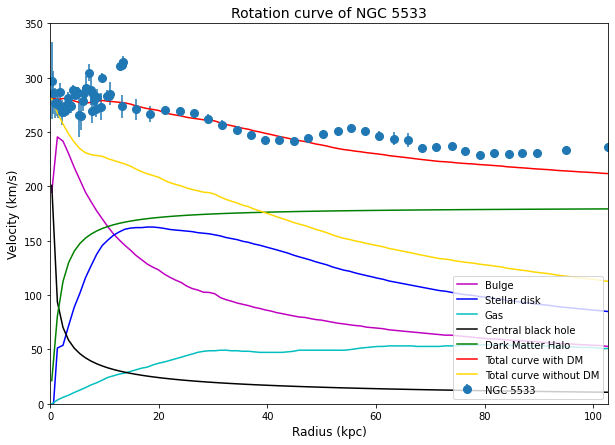

In [18]:
# Define radius for plotting
r_lowerlim = np.min(m_radii)                       # limit the radius to the min value of the measured radius
if r_lowerlim == 0:                                # getting rid of dividing by zero error
    r_lowerlim = 0.01
r_upperlim = np.max(m_radii)                       # limit the radius to the max value of the measured radius
r = np.linspace(r_lowerlim,r_upperlim,100)         # starting from zero results in a divide by zero error

# Plot 
plt.figure(figsize=(10.0,7.0))                     # size of the plot
plt.plot(r, bulge_v(r), color='m', label='Bulge')
plt.plot(r, disk_v(r),  color='b', label='Stellar disk')                        
plt.plot(r, gas_v(r),   color='c', label='Gas')            
plt.plot(r, blackhole_v(r,massbh),  color='k', label='Central black hole')    # only for NGC 5533         
plt.plot(r, halo_v(r,rho0,rc), color='g', label='Dark Matter Halo')   

plt.plot(r, total_v(r,massbh,rho0,rc), color='r', label='Total curve with DM')
plt.plot(r, total_v_noDM(r,massbh), color='gold', label='Total curve without DM')

plt.errorbar(m_radii,m_velocities,yerr=m_v_errors, marker='o', markersize=8, \
             linestyle='none', label='{}'.format(galaxy['galaxyname']))

plt.title('Rotation curve of {}'.format(galaxy['galaxyname']), fontsize=14)     # giving the plot a title
plt.xlabel('Radius (kpc)', fontsize=12)                           # labeling the x-axis
plt.ylabel('Velocity (km/s)', fontsize=12)                        # labeling the y-axis
plt.xlim(0,r_upperlim)                                            # limits of the x-axis
plt.ylim(0,350)                                                   # limits of the y-axis
plt.legend(loc="lower right")
plt.show()

In [19]:
# Time
executionTime = (time.time() - startTime)
ttt=executionTime/60
print(f'Execution time: {ttt:.2f} minutes')

Execution time: 19.34 minutes


# References
>Casertano, Stefano. __"Rotation curve of the edge-on spiral galaxy NGC 5907: disc and halo masses."__ _Monthly Notices of the Royal Astronomical Society_ 203, no. 3 (1983): 735-747. https://doi.org/10.1093/mnras/203.3.735. <br><br>
>Fraternali, F., R. Sancisi, and P. Kamphuis. __“A Tale of Two Galaxies: Light and Mass in NGC 891 and NGC 7814.”__ Astronomy &amp; Astrophysics 531 (June 13, 2011). https://doi.org/10.1051/0004-6361/201116634.<br><br> 
>Jimenez, Raul, Licia Verde, and S. Peng Oh. __"Dark halo properties from rotation curves."__ _Monthly Notices of the Royal Astronomical Society_ 339, no. 1 (2003): 243-259. https://doi.org/10.1046/j.1365-8711.2003.06165.x. <br><br>
>Kapteyn Institute. (n.d.). Groningen Image Processing System. __GIPSY, the GRONINGEN image processing system.__ https://www.astro.rug.nl/~gipsy/index.html. <br><br>
>Karukes, E. V., P. Salucci, and Gianfranco Gentile. __"The dark matter distribution in the spiral NGC 3198 out to 0.22 $R_{vir}$."__ _Astronomy & Astrophysics_ 578 (2015): A13. https://doi.org/10.1051/0004-6361/201425339. <br><br>
>Noordermeer, Edo. __"The rotation curves of flattened Sérsic bulges."__ _Monthly Notices of the Royal Astronomical Society_ 385, no. 3 (2007): 1359-1364. https://doi.org/10.1111/j.1365-2966.2008.12837.x. <br><br>
>Richards, Emily E., L. van Zee, K. L. Barnes, S. Staudaher, D. A. Dale, T. T. Braun, D. C. Wavle, et al. __“Baryonic Distributions in the Dark Matter Halo of NGC 5005.”__ Monthly Notices of the Royal Astronomical Society 449, no. 4 (June 1, 2015): 3981–96. https://doi.org/10.1093/mnras/stv568. 
***